In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# Function to load and preprocess your images
def load_and_preprocess_images(image_folder, img_size=(28, 28)):
    images = []
    for img_name in os.listdir(image_folder):
        img_path = os.path.join(image_folder, img_name)
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        img = img.resize(img_size)  # Resize to img_size
        img = np.array(img) / 255.0  # Normalize
        images.append(img)
    return np.array(images)

# Load your own images
image_folder = 'path/to/your/images'  # Change to your image folder path
x_train = load_and_preprocess_images(image_folder)

# Add noise to the images
def add_noise(images):
    noise_factor = 0.5
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    return np.clip(noisy_images, 0.0, 1.0)

# Add noise to training images
x_train_noisy = add_noise(x_train)

# Build the Denoising Autoencoder model
def build_denoising_autoencoder():
    input_img = layers.Input(shape=(28, 28, 1))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    return autoencoder

# Reshape for the model
x_train = x_train.reshape(-1, 28, 28, 1)  # Ensure the shape is (num_samples, height, width, channels)
x_train_noisy = x_train_noisy.reshape(-1, 28, 28, 1)  # Same reshaping for noisy images

# Build the model
autoencoder = build_denoising_autoencoder()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=128, validation_split=0.1)

# Test the model with a sample
decoded_images = autoencoder.predict(x_train_noisy)

# Display results for the first few images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy Image")
    plt.axis('off')

    # Denoised images
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_images[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised Image")
    plt.axis('off')
plt.show()


NotADirectoryError: [Errno 20] Not a directory: '/content/wp4642409-naruto-manga-wallpapers.jpg'

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# Function to load and preprocess your images
def load_and_preprocess_images(image_path, img_size=(28, 28)): # Changed image_folder to image_path
    """Loads and preprocesses a single image."""
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize(img_size)  # Resize to img_size
    img = np.array(img) / 255.0  # Normalize
    # Reshape for the model
    img = img.reshape(1, 28, 28, 1) # Reshape to (1, 28, 28, 1)
    return img

# Load your image
image_path = '/content/wp4642409-naruto-manga-wallpapers.jpg'  # Path to your image file
x_train = load_and_preprocess_images(image_path) # Load and preprocess the single image


# Add noise to the images
def add_noise(images):
    noise_factor = 0.5
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    return np.clip(noisy_images, 0.0, 1.0)

# Add noise to training image
x_train_noisy = add_noise(x_train)


# Build the Denoising Autoencoder model
def build_denoising_autoencoder():
    input_img = layers.Input(shape=(28, 28, 1))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    return autoencoder

# Reshape for the model
x_train = x_train.reshape(-1, 28, 28, 1)  # Ensure the shape is (num_samples, height, width, channels)
x_train_noisy = x_train_noisy.reshape(-1, 28, 28, 1)  # Same reshaping for noisy images

# Build the model
autoencoder = build_denoising_autoencoder()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=128, validation_split=0.1)

# Test the model with a sample
decoded_images = autoencoder.predict(x_train_noisy)

# Display results for the first few images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy Image")
    plt.axis('off')

    # Denoised images
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_images[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised Image")
    plt.axis('off')
plt.show()

ValueError: Training data contains 1 samples, which is not sufficient to split it into a validation and training set as specified by `validation_split=0.1`. Either provide more data, or a different value for the `validation_split` argument.

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.6982
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 0.6949
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.6926
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.6909
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.6894
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.6879
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.6865
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.6851
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.6838
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.6825
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.6813
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.6797
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.6778
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.6760
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.6743
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━

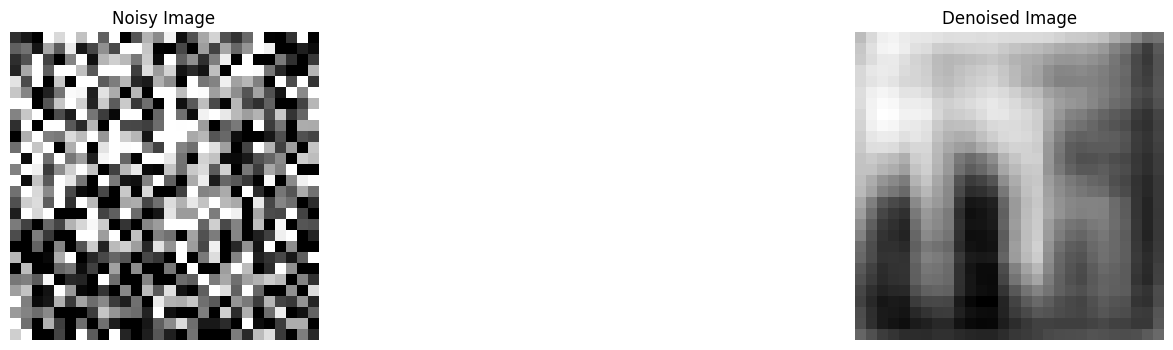

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# Function to load and preprocess your images
def load_and_preprocess_images(image_path, img_size=(28, 28)): # Changed image_folder to image_path
    """Loads and preprocesses a single image."""
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize(img_size)  # Resize to img_size
    img = np.array(img) / 255.0  # Normalize
    # Reshape for the model
    img = img.reshape(1, 28, 28, 1) # Reshape to (1, 28, 28, 1)
    return img

# Load your image
image_path = '/content/wp4642409-naruto-manga-wallpapers.jpg'  # Path to your image file
x_train = load_and_preprocess_images(image_path) # Load and preprocess the single image


# Add noise to the images
def add_noise(images):
    noise_factor = 0.5
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    return np.clip(noisy_images, 0.0, 1.0)

# Add noise to training image
x_train_noisy = add_noise(x_train)


# Build the Denoising Autoencoder model
def build_denoising_autoencoder():
    input_img = layers.Input(shape=(28, 28, 1))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    return autoencoder


# Build the model
autoencoder = build_denoising_autoencoder()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model without validation split
autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=128) # Removed validation_split

# Test the model with a sample
decoded_images = autoencoder.predict(x_train_noisy)

# Display results
plt.figure(figsize=(20, 4))

# Noisy image
plt.subplot(1, 2, 1)
plt.imshow(x_train_noisy.reshape(28, 28), cmap='gray')
plt.title("Noisy Image")
plt.axis('off')

# Denoised image
plt.subplot(1, 2, 2)
plt.imshow(decoded_images.reshape(28, 28), cmap='gray')
plt.title("Denoised Image")
plt.axis('off')

plt.show()